In [2]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr

In [6]:
N_LP=sc.read_h5ad('F:/single cell data/LP_LGN/N_LP_preHVG.h5ad')

In [6]:
N_LP

AnnData object with n_obs × n_vars = 27609 × 20091
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LP', 'n_cells-N2_LP'

In [4]:
N_LGN=sc.read_h5ad('F:/single cell data/LP_LGN/N_LGN_preHVG.h5ad')

In [7]:
N_LGN

AnnData object with n_obs × n_vars = 29504 × 20590
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LGN', 'n_cells-N2_LGN'

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


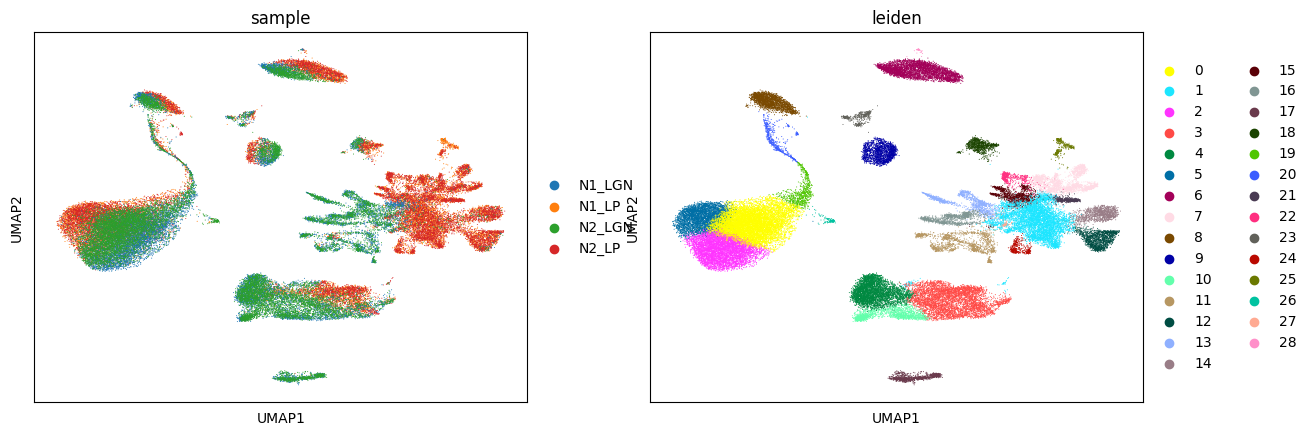

AnnData object with n_obs × n_vars = 57113 × 19679
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LGN-LGN', 'n_cells-N2_LGN-LGN', 'n_cells-N1_LP-LP', 'n_cells-N2_LP-LP', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [32]:
#N_LP_LGN =sc.AnnData.concatenate(N_LP, N_LGN,batch_categories=['LP','LGN'],batch_key='tissue')
#print(N_LP_LGN)
N_LP_LGN=sc.read_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_preHVG.h5ad')
sc.pp.normalize_per_cell(N_LP_LGN,counts_per_cell_after= 1e4)
sc.pp.log1p(N_LP_LGN)
sc.pp.highly_variable_genes(N_LP_LGN, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(N_LP_LGN,svd_solver='arpack')
#sc.external.pp.harmony_integrate(N_LP,key='sample')
sc.pp.neighbors(N_LP_LGN,n_neighbors=25, n_pcs=40)
sc.tl.leiden(N_LP_LGN)
sc.tl.umap(N_LP_LGN)
sc.pl.umap(N_LP_LGN, color=['sample','leiden'],save='N_LP_LGN_sample&leiden.svg')
N_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_HVG.h5ad')
print(N_LP_LGN)

In [63]:
N_LP_LGN = sc.read_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_subclass.h5ad')

In [64]:
glut_gaba_marker_gene = ['Snap25','Gad1','Gad2','Chrna6','Dscaml1','Styk1','Pde3a','Alyref','Dapk3','Pvalb','Htr1a','Penk','Stc1','Rspo2','Slc17a6','Slc17a7','Calb1','Gpr4','Scn4b','Adamts19']
                        #,'Grin2c','Foxb1','Fzd5','C1ql2','Pax6','Nkx2-2','Tcf7l2','Gcnt4']

E:\Python\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


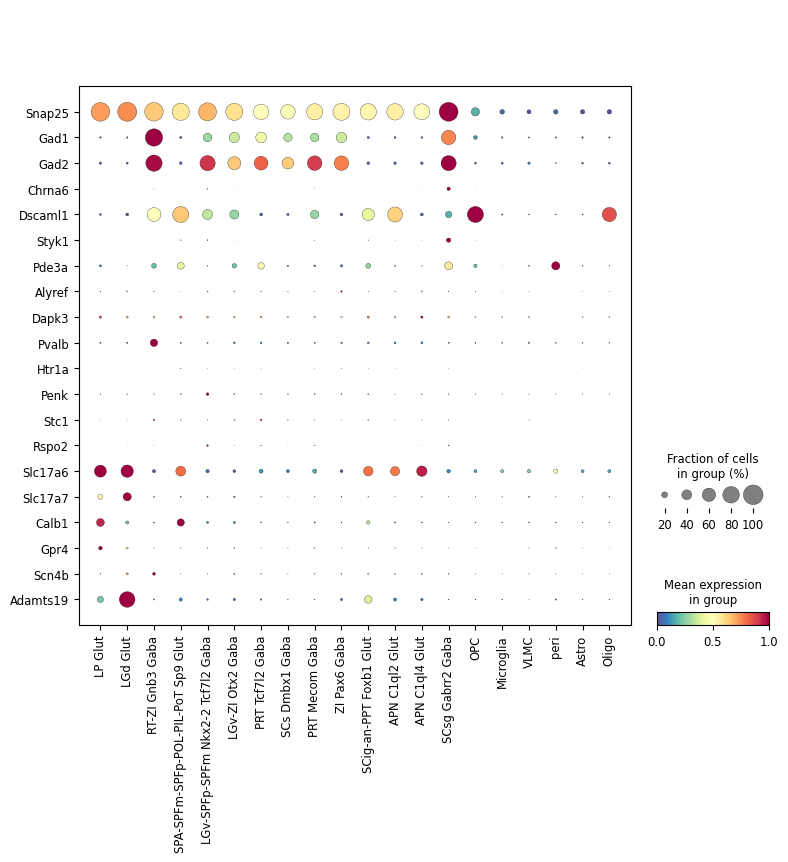

In [67]:
sc.pl.dotplot(N_LP_LGN, glut_gaba_marker_gene, groupby='subclass',swap_axes = 'True',
              cmap='Spectral_r', standard_scale='var',save='N_LP_LGN_subclass_glut_gaba_marker.svg')

In [35]:
non_neuron_marker_gene = ['Snap25','Gad2',
               'Sox9','Aqp4','Grin2b','Dao','Hs3st3a1','Otx2','Foxj1','Sspo','Ttr','Sox10','Apod','Pdgfra','Opalin','Foxc1',
               'Igf2','Slc6a20a','Vtn','Kcnj8','Acta2','Myh11','Ly6c1','Slco1a4','Flt1','Ikzf1','Ptprc','Ifitm10','Siglech','Csf3r','C1qa','F13a1','Mrc1',
               'Cd52','Fgr','Cd74','Ccl5']

E:\Python\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


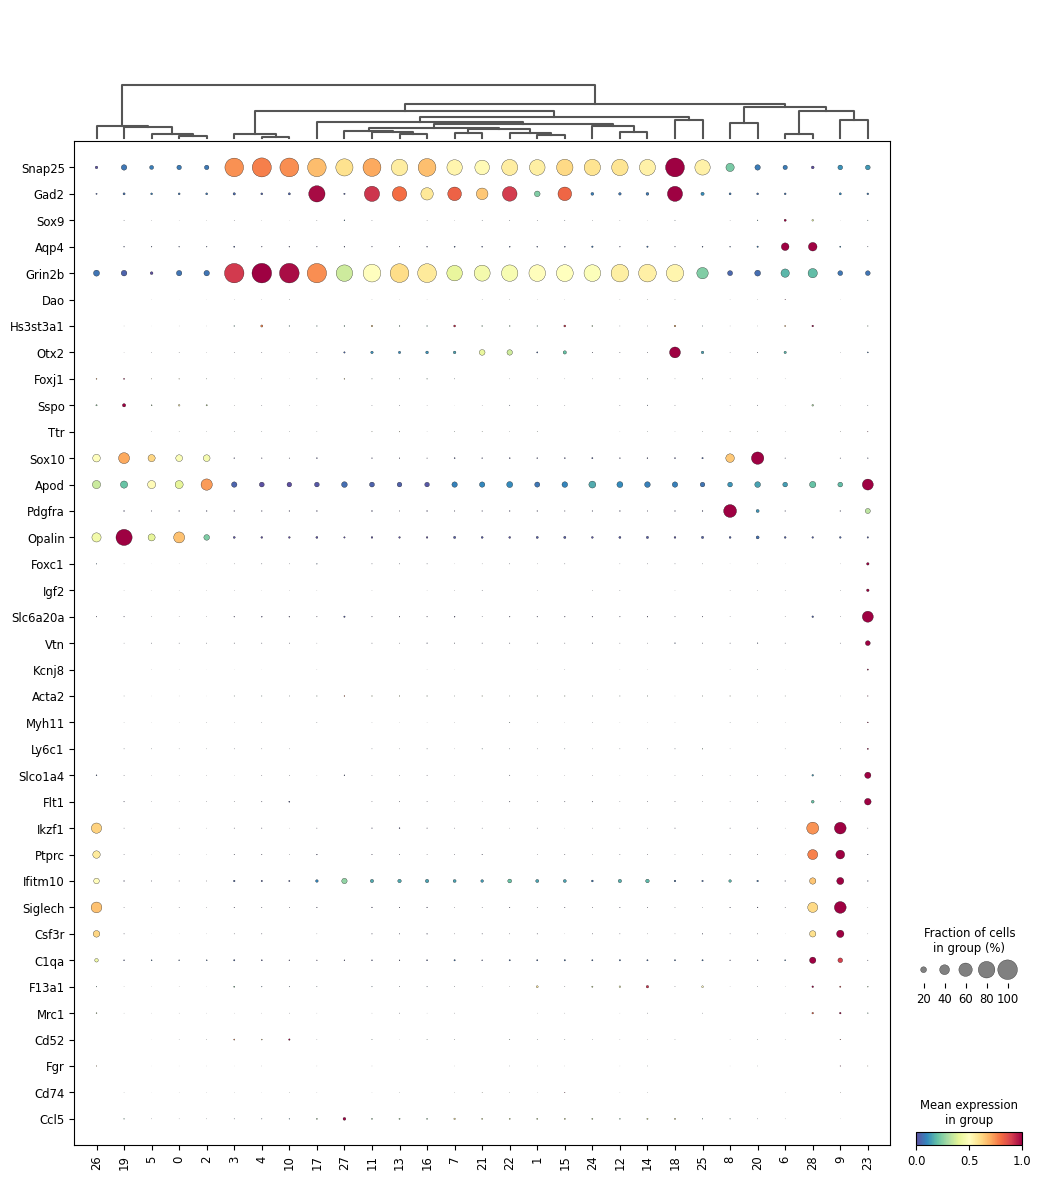

In [36]:
sc.pl.dotplot(N_LP_LGN, non_neuron_marker_gene, groupby='leiden',dendrogram='True',swap_axes = 'True',
              cmap='Spectral_r', standard_scale='var',save='N_LP_LGN_celltype_non_neuron_marker.svg')

In [38]:
N_LP_LGN_leiden =N_LP_LGN.obs['leiden']
N_LP_LGN_leiden.to_csv('F:/single cell data/LP_LGN/N_LP_LGN_leiden_1.csv')

In [4]:
N_LP_LGN =sc.read_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_preHVG.h5ad')

In [5]:
N_LP_LGN

AnnData object with n_obs × n_vars = 57113 × 19679
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LGN-LGN', 'n_cells-N2_LGN-LGN', 'n_cells-N1_LP-LP', 'n_cells-N2_LP-LP'

In [39]:
#LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba A: Gaba 4, LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba B: Gaba6, RT-ZI Gnb3 Gaba:Gaba 1, SCsg Gabrr2 Gaba: Chrna1,PRT Tcf7l2 Gaba :Gaba5
cluster_dict = {3:'LP Glut', 4:'LGd Glut A', 10:'LGd Glut B',17:'RT-ZI Gnb3 Gaba', 27:'SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut',11:'LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba',13:'Mix Gaba',16:'LGv-ZI Otx2 Gaba',7:'PRT Tcf7l2 Gaba',21:'SCs Dmbx1 Gaba',22:'PRT Mecom Gaba',
                 1:'Mix Glut',15:'Mix gaba',24:'SCig-an-PPT Foxb1 Glut',12:'APN C1ql2 Glut',14:'APN C1ql4 Glut',18:'SCsg Gabrr2 Gaba',25:'MH Tac2 Glut',8:'OPC',20:'Oligo A',6:'Astro A',28:'Astro B',9:'Microglia',23:'VLMC-Peri',26:'Oligo B',
                 19:'Oligo C',5:'Oligo D',0:'Oligo E',2:'Oligo F'}

In [40]:
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
N_LP_LGN.obs['cluster']= N_LP_LGN.obs['leiden']
N_LP_LGN.rename_categories(key='cluster', categories=cluster)
N_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_cluster.h5ad')

In [41]:
presubclass = pd.read_csv('F:/single cell data/LP_LGN/N_LP_LGN_leiden_presubclass.csv',index_col='cell_id')
preclass = pd.read_csv('F:/single cell data/LP_LGN/N_LP_LGN_leiden_preclass.csv',index_col='cell_id')
N_LP_LGN.obs['presubclass'] = presubclass
N_LP_LGN.obs['preclass'] = preclass
N_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/N_LP_LGN_precluster.h5ad')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


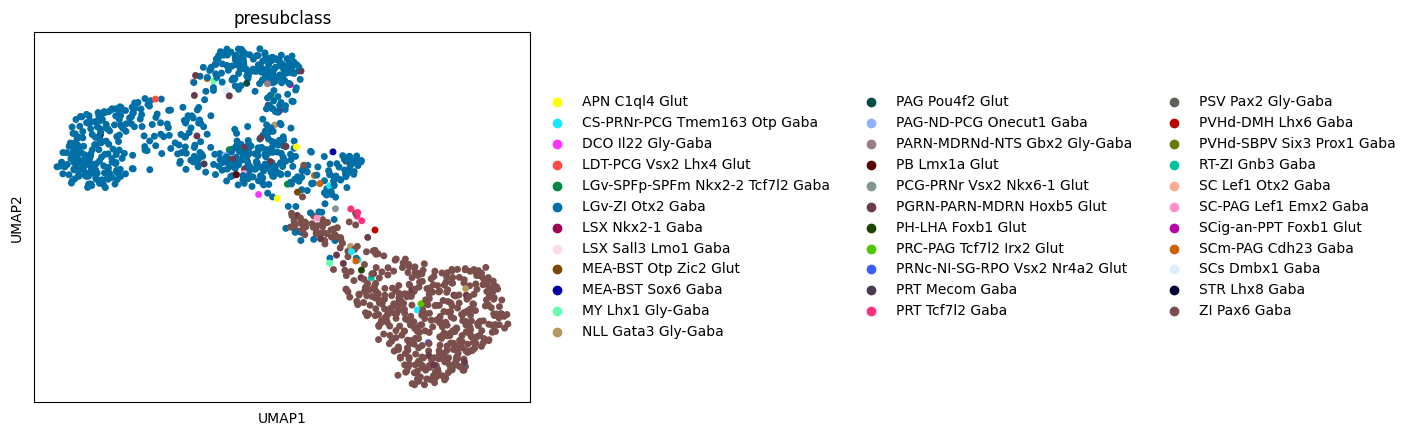

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


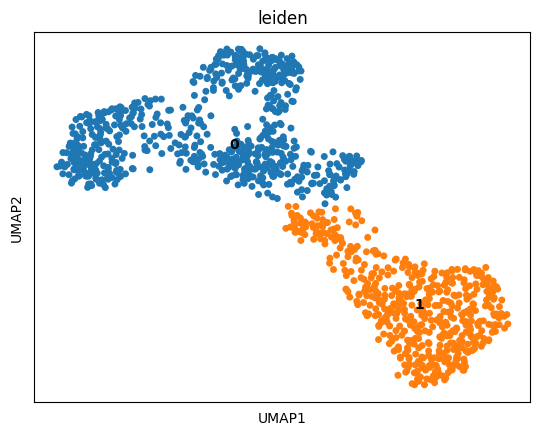

In [49]:
leiden_13 = N_LP_LGN[N_LP_LGN.obs['leiden']=='13']
sc.tl.pca(leiden_13,svd_solver='arpack')
sc.pp.neighbors(leiden_13,n_neighbors=25)
sc.tl.leiden(leiden_13,resolution=0.1)
sc.tl.umap(leiden_13)
sc.pl.umap(leiden_13, color='presubclass')
sc.pl.umap(leiden_13, color='leiden',legend_loc='on data', legend_fontsize='10')
cluster_dict = {0:'LGv-ZI Otx2 Gaba',1:'ZI Pax6 Gaba'}
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
leiden_13.obs['cluster']= leiden_13.obs['leiden']
leiden_13.rename_categories(key='cluster', categories=cluster)

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


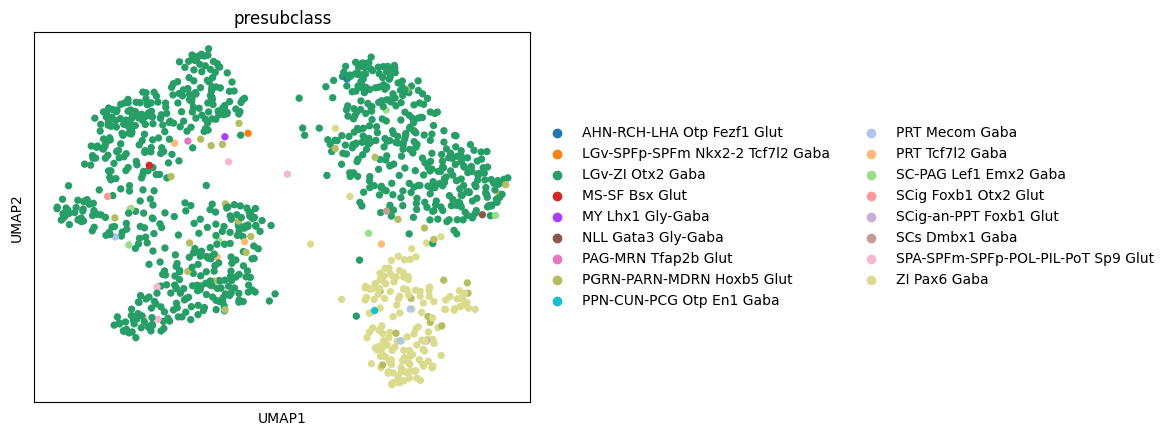

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


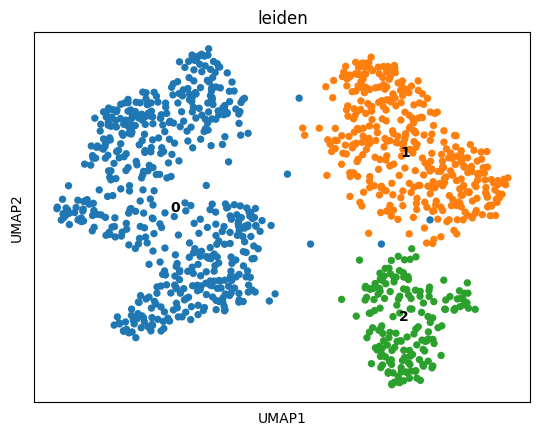

In [54]:
leiden_16 = N_LP_LGN[N_LP_LGN.obs['leiden']=='16']
sc.tl.pca(leiden_16,svd_solver='arpack')
sc.pp.neighbors(leiden_16,n_neighbors=25)
sc.tl.leiden(leiden_16,resolution=0.1)
sc.tl.umap(leiden_16)
sc.pl.umap(leiden_16, color='presubclass')
sc.pl.umap(leiden_16, color='leiden',legend_loc='on data', legend_fontsize='10')
cluster_dict = {0:'LGv-ZI Otx2 Gaba A',1:'LGv-ZI Otx2 Gaba B',2:'ZI Pax6 Gaba'}
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
leiden_16.obs['cluster']= leiden_16.obs['leiden']
leiden_16.rename_categories(key='cluster', categories=cluster)

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


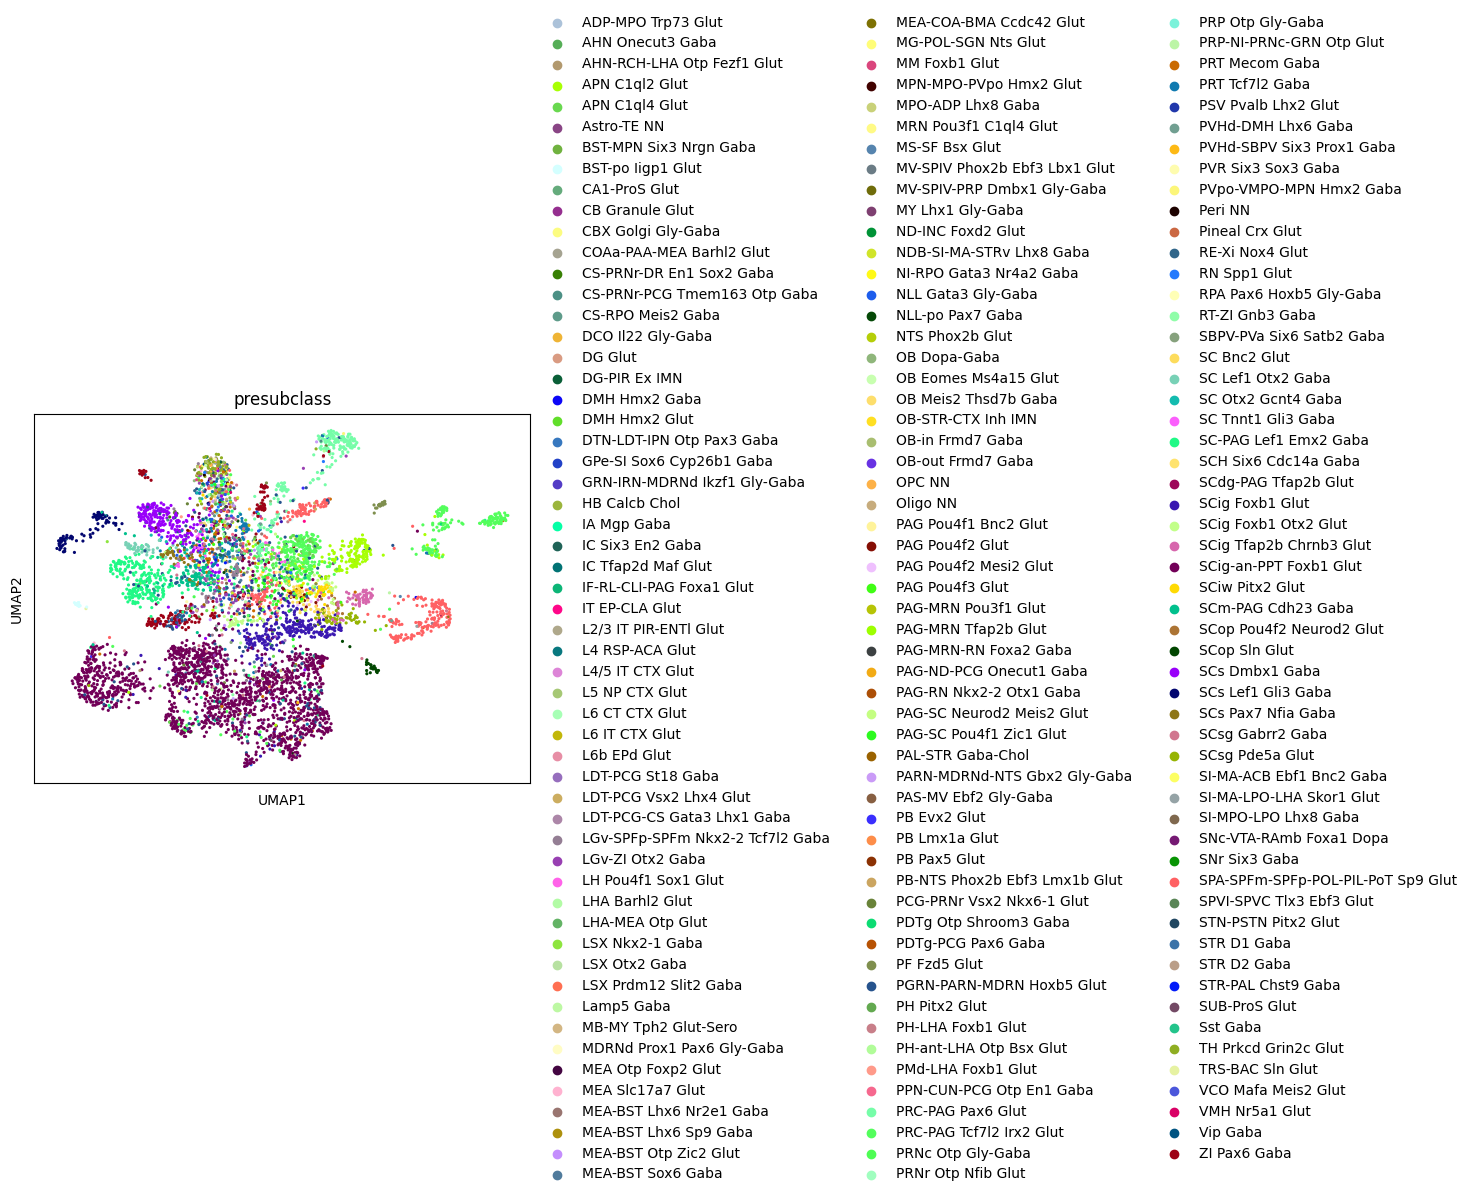

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


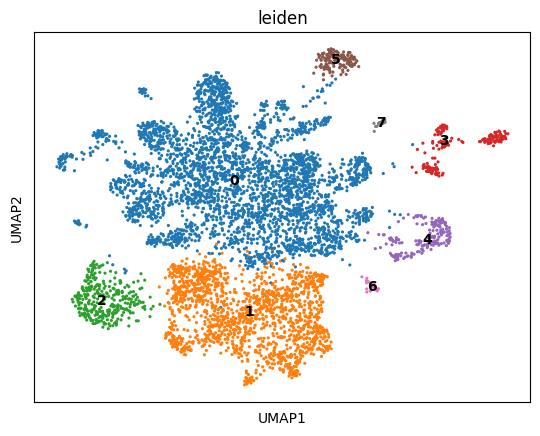

In [57]:
leiden_1 = N_LP_LGN[N_LP_LGN.obs['leiden']=='1']
sc.tl.pca(leiden_1,svd_solver='arpack')
sc.pp.neighbors(leiden_1,n_neighbors=25)
sc.tl.leiden(leiden_1,resolution=0.1)

sc.tl.umap(leiden_1)
sc.pl.umap(leiden_1, color='presubclass',palette = list(matplotlib.colors.XKCD_COLORS.values()))
sc.pl.umap(leiden_1, color='leiden',legend_loc='on data', legend_fontsize='10')
cluster_dict = {0:'Mix A',1:'LGv-ZI Otx2 Gaba A',2:'LGv-ZI Otx2 Gaba B',3:'Mix B',4:'Mix C',5:'Mix D',6:'Mix E',7:'Mix F'}
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
leiden_1.obs['cluster']= leiden_1.obs['leiden']
leiden_1.rename_categories(key='cluster', categories=cluster)

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


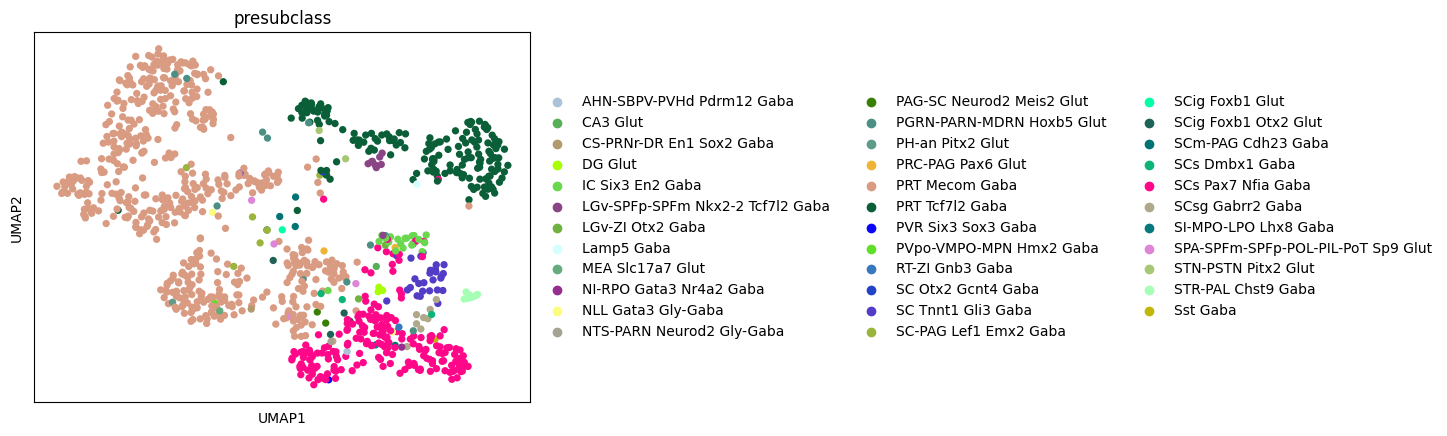

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


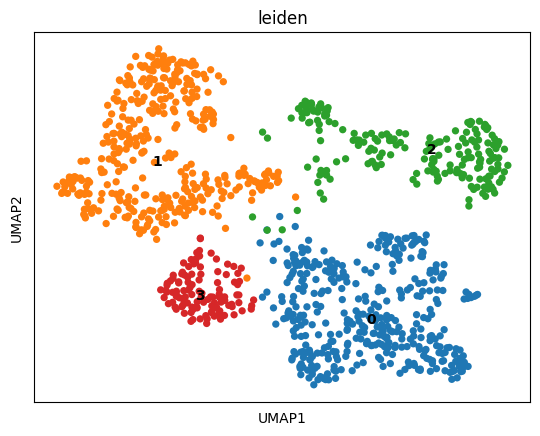

In [62]:
leiden_15 = N_LP_LGN[N_LP_LGN.obs['leiden']=='15']
sc.tl.pca(leiden_15,svd_solver='arpack')
sc.pp.neighbors(leiden_15,n_neighbors=25)
sc.tl.leiden(leiden_15,resolution=0.2)

sc.tl.umap(leiden_15)
sc.pl.umap(leiden_15, color='presubclass',palette = list(matplotlib.colors.XKCD_COLORS.values()))
sc.pl.umap(leiden_15, color='leiden',legend_loc='on data', legend_fontsize='10')
cluster_dict = {0:'Mix',1:'PRT Mecom Gaba A',2:'PRT Tcf7l2 Gaba',3:'PRT Mecom Gaba B'}
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
leiden_15.obs['cluster']= leiden_15.obs['leiden']
leiden_15.rename_categories(key='cluster', categories=cluster)